In [1]:
from tf_unet import unet, util, image_util
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np
#import scipy
from scipy import misc
%matplotlib inline

In [4]:
#DATA_ROOT = "/Users/cesare.chung/int/01_CODE_UNET/NEW/"
DATA_ROOT = "/Users/chung/int/"

masks_dir = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize/*_mask.gif"))
imgs_dir  = sorted(glob.glob(DATA_ROOT+"/trainData_tftf/resize/*_training.tif"))

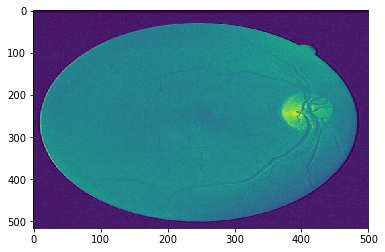

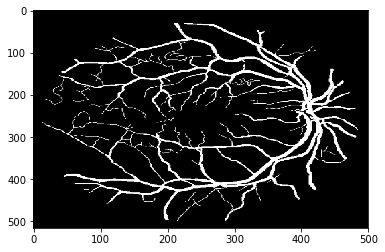

In [5]:
X_data=[]
for index,entry in enumerate(imgs_dir):
    img = misc.imread(entry)
    X_data.append(img)

Y_data=[]
for index,entry in enumerate(masks_dir):
    img = misc.imread(entry)
    Y_data.append(img)

X_data=np.array(X_data)
Y_data=np.array(Y_data)

plt.imshow(X_data[4,...,2], aspect="auto")   # X_data[i,...,j]. i = 1,..., number of samples; j = 1,2,3
plt.show()
plt.imshow(Y_data[4,...,], aspect="auto",cmap='gray')
plt.show()

In [6]:
#preparing data loading

#data_provider = image_util.ImageDataProvider(DATA_ROOT+"/trainData_tf/*.jpg", data_suffix="_img.jpg", mask_suffix="_mask.jpg")
#data_provider.n_class = 2

data_provider = image_util.ImageDataProvider(DATA_ROOT+"/trainData_tftf/resize/*",data_suffix="_training.tif", mask_suffix="_mask.gif")
#data_provider.n_class = 2

#search_path = DATA_ROOT+"/trainData_tf2/*"
#data_provider = image_util.ImageDataProvider(search_path, a_min=0, a_max=255, data_suffix="_training.tif", mask_suffix="_mask.gif")
#data_provider.n_class = 2

Number of files used: 5


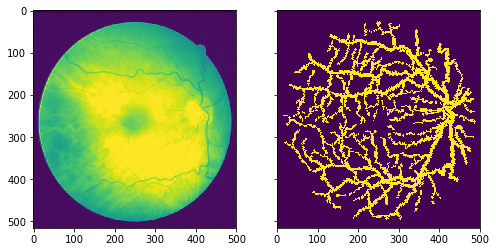

In [7]:
x_test, y_test = data_provider(1)

fig, ax = plt.subplots(1,2, sharey=True, figsize=(8,4))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
plt.show()

In [8]:
print(x_test.shape)
print(y_test.shape)

print(data_provider.channels)
print(data_provider.n_class)

(1, 516, 500, 3)
(1, 516, 500, 2)
3
2


In [9]:
#setup & training

#net = unet.Unet(layers=3, features_root=64, channels=3, n_class=2)

net = unet.Unet(channels=data_provider.channels, n_class=data_provider.n_class, layers=3, features_root=64)
trainer = unet.Trainer(net, optimizer="adam")

#net = unet.Unet(channels=data_provider.channels,n_class=data_provider.n_class)
#trainer = unet.Trainer(net, optimizer="momentum", opt_kwargs=dict(momentum=0.2))

#z,y=data_provider(1)

2017-10-30 21:17:51,095 Layers 3, features 64, filter size 3x3, pool size: 2x2


In [10]:
path = trainer.train(data_provider, output_path="out", training_iters=20, epochs=3,dropout=0.75, display_step=2)

2017-10-30 21:19:27,621 Removing '/Users/chung/int/01_Face/prediction'
2017-10-30 21:19:27,623 Removing '/Users/chung/int/01_Face/out'
2017-10-30 21:19:27,624 Allocating '/Users/chung/int/01_Face/prediction'
2017-10-30 21:19:27,626 Allocating '/Users/chung/int/01_Face/out'
2017-10-30 21:20:57,107 Verification error= 79.8%, loss= 0.7105
2017-10-30 21:21:03,886 Start optimization
2017-10-30 21:22:22,593 Iter 0, Minibatch Loss= 0.6222, Training Accuracy= 0.8550, Minibatch error= 14.5%
2017-10-30 21:24:26,121 Iter 2, Minibatch Loss= 0.6500, Training Accuracy= 0.7376, Minibatch error= 26.2%
2017-10-30 21:26:14,331 Iter 4, Minibatch Loss= 0.5831, Training Accuracy= 0.7826, Minibatch error= 21.7%
2017-10-30 21:28:06,395 Iter 6, Minibatch Loss= 0.6164, Training Accuracy= 0.7376, Minibatch error= 26.2%
2017-10-30 21:29:53,571 Iter 8, Minibatch Loss= 0.5765, Training Accuracy= 0.8186, Minibatch error= 18.1%
2017-10-30 21:31:43,378 Iter 10, Minibatch Loss= 0.5958, Training Accuracy= 0.7376, Minib

In [11]:
x_test, y_test = data_provider(1)

prediction = net.predict("./out/model.cpkt", x_test)


INFO:tensorflow:Restoring parameters from ./out/model.cpkt


2017-10-30 22:33:12,295 Restoring parameters from ./out/model.cpkt
2017-10-30 22:33:12,940 Model restored from file: ./out/model.cpkt


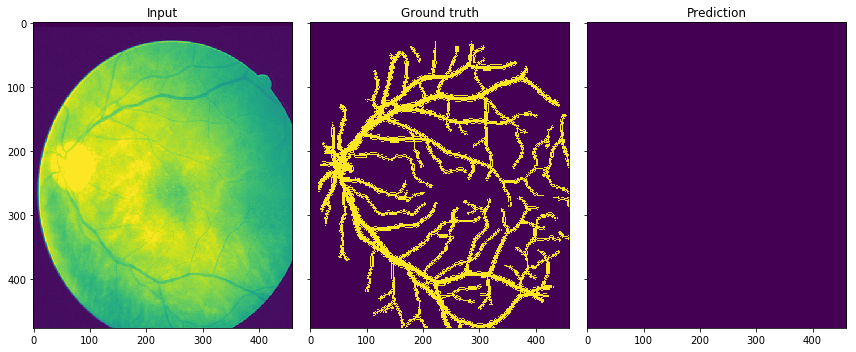

In [12]:
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(12,5))
ax[0].imshow(x_test[0,...,0], aspect="auto")
ax[1].imshow(y_test[0,...,1], aspect="auto")
mask = prediction[0,...,1] > 0.9
ax[2].imshow(mask, aspect="auto")
ax[0].set_title("Input")
ax[1].set_title("Ground truth")
ax[2].set_title("Prediction")
fig.tight_layout()

plt.show()

In [13]:
unet.error_rate(prediction, util.crop_to_shape(y_test, prediction.shape))


18.144866642309097

In [14]:
img = util.combine_img_prediction(x_test,y_test,prediction)
util.save_image(img, "/Users/chung/int/retina_problem.png")
